In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from utils import add_decision_boundary

In [36]:
# ## Read the data

data = pd.read_csv(
    "~/Documents/UTC/P24/SY09/Projet/projet_git/SY09_projet/spotify-2023.csv",
    encoding="latin-1",
)
data.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [37]:
relevant_columns = [
    "streams",
    "released_year",
    "in_spotify_playlists",
]
df_reg_log = data[relevant_columns].copy()

In [38]:
df_reg_log["streams"] = pd.to_numeric(df_reg_log["streams"], errors="coerce")
df_reg_log.dropna(inplace=True)

In [39]:
df_reg_log.info()

<class 'pandas.core.frame.DataFrame'>
Index: 952 entries, 0 to 952
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   streams               952 non-null    float64
 1   released_year         952 non-null    int64  
 2   in_spotify_playlists  952 non-null    int64  
dtypes: float64(1), int64(2)
memory usage: 29.8 KB


In [40]:
print(df_reg_log["in_spotify_playlists"].median())

2216.5


/tmp/ipykernel_14713/762364515.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="in_spotify_playlists_class", data=df_reg_log, palette="viridis")


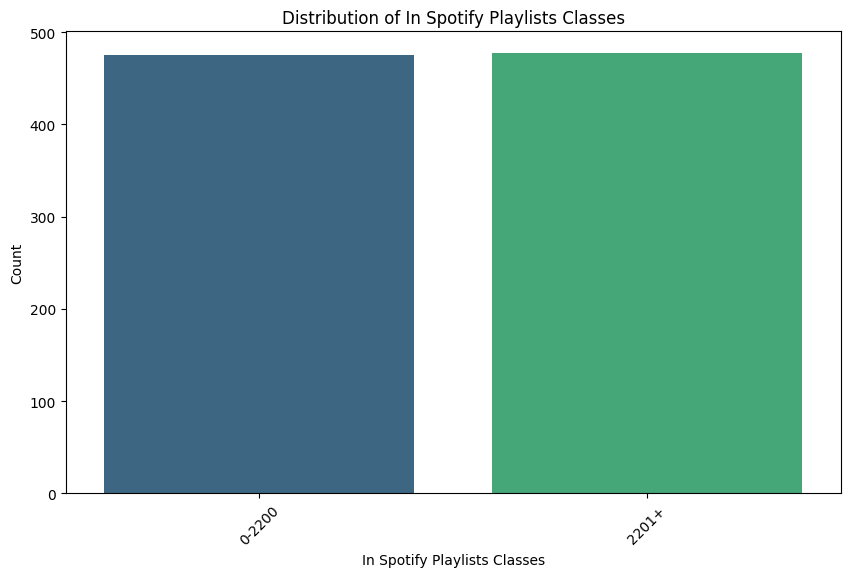

In [41]:
class_intervals = [
    (0, 2200),
    (2201, float("inf")),
]
class_labels = ["0-2200", "2201+"]

# Assign each bpm value to a class
df_reg_log["in_spotify_playlists_class"] = pd.cut(
    df_reg_log["in_spotify_playlists"],
    bins=[interval[0] for interval in class_intervals] + [float("inf")],
    labels=class_labels,
)
# Create the barplot
plt.figure(figsize=(10, 6))
sns.countplot(x="in_spotify_playlists_class", data=df_reg_log, palette="viridis")
plt.xlabel("In Spotify Playlists Classes")
plt.ylabel("Count")
plt.title("Distribution of In Spotify Playlists Classes")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()
df_reg_log.drop("in_spotify_playlists", axis=1, inplace=True)

In [42]:
df_reg_log.head()

,streams,released_year,in_spotify_playlists_class
0,141381703.0,2023,0-2200
1,133716286.0,2023,0-2200
2,140003974.0,2023,0-2200
3,800840817.0,2019,2201+
4,303236322.0,2023,2201+


In [43]:
X = df_reg_log.iloc[:, :-1]
y = df_reg_log.iloc[:, -1]

In [49]:
cls = LogisticRegression()
score = 0
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.66)
    cls.fit(X_train, y_train)
    y_pred = cls.predict(X_test)
    score += accuracy_score(y_pred, y_test)
print(score/10)  #  ~ 0.85

0.8580246913580247


(100, 100)


/home/eliott/.virtualenvs/dev/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/home/eliott/.virtualenvs/dev/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


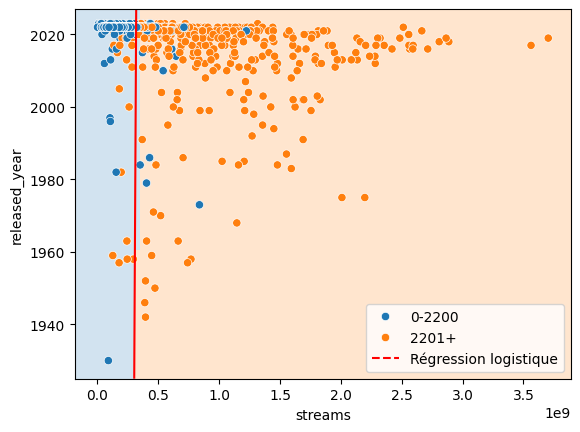

In [50]:
ax=sns.scatterplot(data=df_reg_log, x="streams", y="released_year", hue="in_spotify_playlists_class")
ax.set_ylim(1925, 2027)
add_decision_boundary(cls, label="Régression logistique", levels=[0.5], ax=ax)